In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/census_bureau_acs.csv')
df.head()

,geo_id,total_pop,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more
0,5,2990671.0,25635.0,93423.0,74534.0,70617.0,73576.0,69556.0,65675.0,61375.0,60069.0,51743.0,95124.0,111457.0,124254.0,78338.0,44816.0,39928.0,37690.0
1,2,738516.0,35874.0,10230.0,7609.0,7962.0,8567.0,8830.0,8897.0,8630.0,9759.0,8172.0,18000.0,27311.0,36073.0,29553.0,20043.0,23692.0,20134.0
2,10,949495.0,33989.0,19901.0,12769.0,12490.0,15416.0,15365.0,16843.0,15105.0,14978.0,13875.0,27672.0,36996.0,50512.0,34311.0,22450.0,25568.0,23514.0
3,48,27885195.0,30143.0,609111.0,415778.0,431000.0,454863.0,460236.0,456584.0,419784.0,431876.0,372502.0,753148.0,942058.0,1168213.0,839610.0,552446.0,588275.0,657562.0
4,16,1687809.0,26772.0,38492.0,29568.0,29865.0,33635.0,31268.0,34988.0,32391.0,31324.0,28244.0,54943.0,70028.0,76641.0,51057.0,28311.0,25253.0,22323.0


## Mean income in the US:

In [3]:
# calculating mean income in the US
mean_income_us = sum(df['total_pop']*df['income_per_capita'])/df['total_pop'].sum()
print(f'Mean income in the US >> ${round(mean_income_us, 2)}')

Mean income in the US >> $32411.26


In [4]:
# transforming table for Mean and Median estimation
geoid = ['06', '36', '48', '12']
df = df[df['geo_id'].isin(geoid)].drop(['total_pop', 'income_per_capita'], axis=1).set_index('geo_id')
df = df.T.rename(columns={48: 'TX', 12: 'FL', 36: 'NY', 6: 'CA'})
df

geo_id,TX,FL,NY,CA
income_less_10000,609111.0,520876.0,492408.0,656515.0
income_10000_14999,415778.0,360160.0,378399.0,573531.0
income_15000_19999,431000.0,389340.0,325767.0,499894.0
income_20000_24999,454863.0,410675.0,318683.0,536077.0
income_25000_29999,460236.0,410787.0,301819.0,510114.0
income_30000_34999,456584.0,402990.0,300327.0,513108.0
income_35000_39999,419784.0,382842.0,275108.0,480115.0
income_40000_44999,431876.0,377521.0,279709.0,495884.0
income_45000_49999,372502.0,331613.0,243067.0,439574.0
income_50000_59999,753148.0,630925.0,492299.0,880868.0


## Mathematical derivation of Median and Mean income by state

In [5]:
# transitional calculations for Mean and Median estimation
df = df.reset_index()

state_list = ['TX', 'CA', 'NY', 'FL']

df['bin_lower'] = df['index'].apply(lambda x: x.split('_')[1]).str.replace('less', '0').astype(int)
df['bin_upper'] = df['index'].apply(lambda x: x.split('_')[2]).str.replace('or', '1000000').astype(int)
df['bin_mean'] = (df['bin_upper'] + df['bin_lower'])/2
df['bin_width'] = df['bin_upper'] - df['bin_lower']
df['bin_width_norm'] = round(df['bin_width']/min(df['bin_width']))

# adding new calculated columns
for state in state_list:
    # calculating histogram height for each state and bin
    df[f'{state}_hist'] = round(df[f'{state}']/df['bin_width_norm'], 2)
    # calculating cumulative areas under the histogram
    df[f'{state}_cum_area'] = df[f'{state}'].cumsum().tolist() 

In [6]:
df

geo_id,index,TX,FL,NY,CA,bin_lower,bin_upper,bin_mean,bin_width,bin_width_norm,TX_hist,TX_cum_area,CA_hist,CA_cum_area,NY_hist,NY_cum_area,FL_hist,FL_cum_area
0,income_less_10000,609111.0,520876.0,492408.0,656515.0,0,10000,5000.0,10000,2.0,304555.50,609111.0,328257.50,656515.0,246204.0,492408.0,260438.00,520876.0
1,income_10000_14999,415778.0,360160.0,378399.0,573531.0,10000,14999,12499.5,4999,1.0,415778.00,1024889.0,573531.00,1230046.0,378399.0,870807.0,360160.00,881036.0
2,income_15000_19999,431000.0,389340.0,325767.0,499894.0,15000,19999,17499.5,4999,1.0,431000.00,1455889.0,499894.00,1729940.0,325767.0,1196574.0,389340.00,1270376.0
3,income_20000_24999,454863.0,410675.0,318683.0,536077.0,20000,24999,22499.5,4999,1.0,454863.00,1910752.0,536077.00,2266017.0,318683.0,1515257.0,410675.00,1681051.0
4,income_25000_29999,460236.0,410787.0,301819.0,510114.0,25000,29999,27499.5,4999,1.0,460236.00,2370988.0,510114.00,2776131.0,301819.0,1817076.0,410787.00,2091838.0
5,income_30000_34999,456584.0,402990.0,300327.0,513108.0,30000,34999,32499.5,4999,1.0,456584.00,2827572.0,513108.00,3289239.0,300327.0,2117403.0,402990.00,2494828.0
6,income_35000_39999,419784.0,382842.0,275108.0,480115.0,35000,39999,37499.5,4999,1.0,419784.00,3247356.0,480115.00,3769354.0,275108.0,2392511.0,382842.00,2877670.0
7,income_40000_44999,431876.0,377521.0,279709.0,495884.0,40000,44999,42499.5,4999,1.0,431876.00,3679232.0,495884.00,4265238.0,279709.0,2672220.0,377521.00,3255191.0
8,income_45000_49999,372502.0,331613.0,243067.0,439574.0,45000,49999,47499.5,4999,1.0,372502.00,4051734.0,439574.00,4704812.0,243067.0,2915287.0,331613.00,3586804.0
9,income_50000_59999,753148.0,630925.0,492299.0,880868.0,50000,59999,54999.5,9999,2.0,376574.00,4804882.0,440434.00,5585680.0,246149.5,3407586.0,315462.50,4217729.0


In [6]:
def median_by_state(state_abbrev):
    # calculating the range that the median falls in
    # current_bin - index of lower limit of the bin where the median falls
    print('='*60)
    print(state_abbrev)
    print('='*60)
    current_bin = 0
    cumul_areas = df[f'{state_abbrev}_cum_area'].tolist()
    for ind, num in enumerate(cumul_areas):
        # area under histogram on both sides of the median
        median_area = df[f'{state_abbrev}'].sum()/2 
        if median_area >= num:
            current_bin = ind+1
            cumul_area = num
    bin_bottom_income = df['bin_lower'].tolist()[current_bin]
    print(f'Area under histogram on the sides of the median is {median_area}')
    print(f'Median falls into {current_bin}th bin')
    print(f'Bottom income for the bin is {bin_bottom_income}')
    print(f'Cumulative area on the left the bin lower limit is {cumul_area}')

    residual_area = median_area - cumul_area
    print(f'The residual area under the histogram is {residual_area}')

    # remaining area 
    current_bin_width = df['bin_width'].tolist()[current_bin]
    current_bin_freq = df[f'{state_abbrev}'].tolist()[current_bin]
    residual_len = (current_bin_width * residual_area)/current_bin_freq
    print(f'bin width={current_bin_width} residual area={residual_area} current bin frequency={current_bin_freq}')
    print(f'The residual length from bottom range of the bin is {round(residual_len, 2)}')

    median = bin_bottom_income + residual_len
    print(f'Median income per household in {state_abbrev} >> ${round(median, 2)}')

## Median annual household income in Texas, California, New York and Florida

In [7]:
for state in state_list:
    median_by_state(state)

TX
Area under histogram on the sides of the median is 4776523.0
Median falls into 9th bin
Bottom income for the bin is 50000
Cumulative area on the left the bin lower limit is 4051734.0
The residual area under the histogram is 724789.0
bin width=9999 residual area=724789.0 current bin frequency=753148.0
The residual length from bottom range of the bin is 9622.5
Median income per household in TX >> $59622.5
CA
Area under histogram on the sides of the median is 6482717.5
Median falls into 10th bin
Bottom income for the bin is 60000
Cumulative area on the left the bin lower limit is 5585680.0
The residual area under the histogram is 897037.5
bin width=14999 residual area=897037.5 current bin frequency=1184505.0
The residual length from bottom range of the bin is 11358.89
Median income per household in CA >> $71358.89
NY
Area under histogram on the sides of the median is 3658268.5
Median falls into 10th bin
Bottom income for the bin is 60000
Cumulative area on the left the bin lower limit 

## Mean annual household income in Texas, California, New York and Florida

In [17]:
# estimating state means
mean_income_state = {}

for state in state_list:
    mean_income_state[f'{state}'] = round((df['bin_mean']*df[f'{state}_hist']).sum()/df[f'{state}'].sum(), 2)

for item, value in mean_income_state.items():
    print(f'Mean income per household in {item} >> ${value}') 

Mean income per household in TX >> $22294.07
Mean income per household in CA >> $21204.87
Mean income per household in NY >> $21045.79
Mean income per household in FL >> $22839.67


## Percentile graphs

In [17]:
# calculating cumulative percentage of observations have occurred up to a given bin 
for col in df[state_list]:
    df[f'{col}_percentile'] = round(df[f'{col}'].cumsum()*100/df[f'{col}'].sum(), 2)
df

geo_id,index,TX,FL,NY,CA,TX_cum_area,bin_lower,bin_upper,bin_mean,bin_width,bin_width_norm,TX_percentile,CA_percentile,NY_percentile,FL_percentile
0,income_less_10000,609111.0,520876.0,492408.0,656515.0,609111.0,0,10000,5000.0,10000,2.0,6.38,5.06,6.73,6.83
1,income_10000_14999,415778.0,360160.0,378399.0,573531.0,1024889.0,10000,14999,12499.5,4999,1.0,10.73,9.49,11.90,11.56
2,income_15000_19999,431000.0,389340.0,325767.0,499894.0,1455889.0,15000,19999,17499.5,4999,1.0,15.24,13.34,16.35,16.67
3,income_20000_24999,454863.0,410675.0,318683.0,536077.0,1910752.0,20000,24999,22499.5,4999,1.0,20.00,17.48,20.71,22.06
4,income_25000_29999,460236.0,410787.0,301819.0,510114.0,2370988.0,25000,29999,27499.5,4999,1.0,24.82,21.41,24.84,27.45
5,income_30000_34999,456584.0,402990.0,300327.0,513108.0,2827572.0,30000,34999,32499.5,4999,1.0,29.60,25.37,28.94,32.73
6,income_35000_39999,419784.0,382842.0,275108.0,480115.0,3247356.0,35000,39999,37499.5,4999,1.0,33.99,29.07,32.70,37.76
7,income_40000_44999,431876.0,377521.0,279709.0,495884.0,3679232.0,40000,44999,42499.5,4999,1.0,38.51,32.90,36.52,42.71
8,income_45000_49999,372502.0,331613.0,243067.0,439574.0,4051734.0,45000,49999,47499.5,4999,1.0,42.41,36.29,39.85,47.06
9,income_50000_59999,753148.0,630925.0,492299.0,880868.0,4804882.0,50000,59999,54999.5,9999,2.0,50.30,43.08,46.57,55.34


ValueError: x must be a label or position

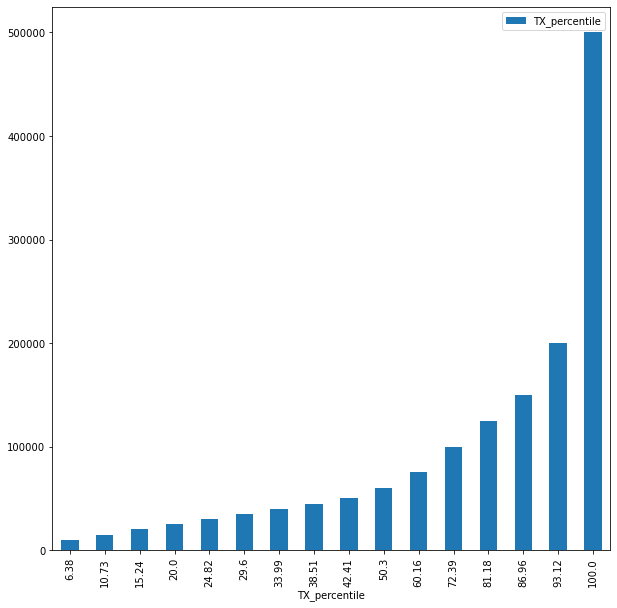

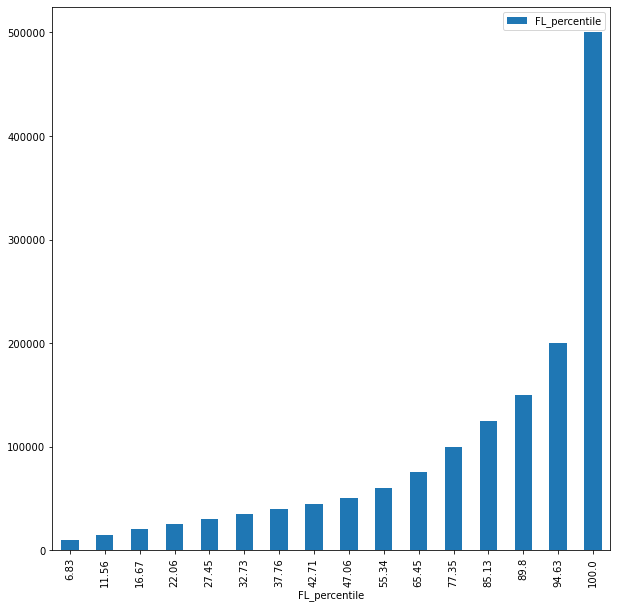

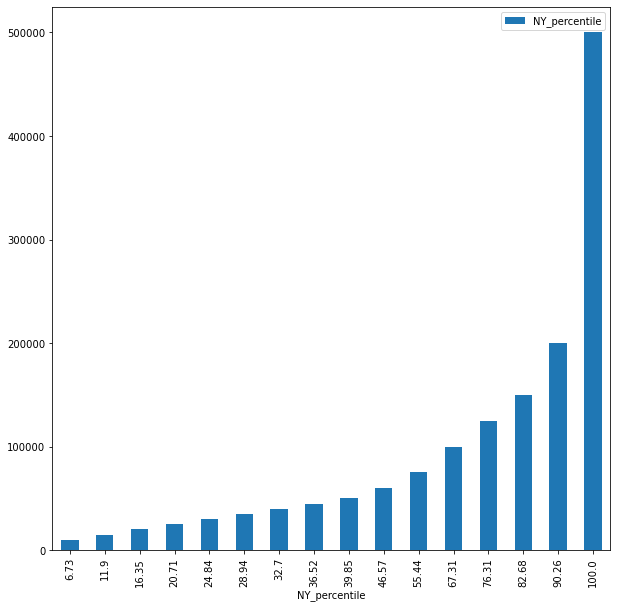

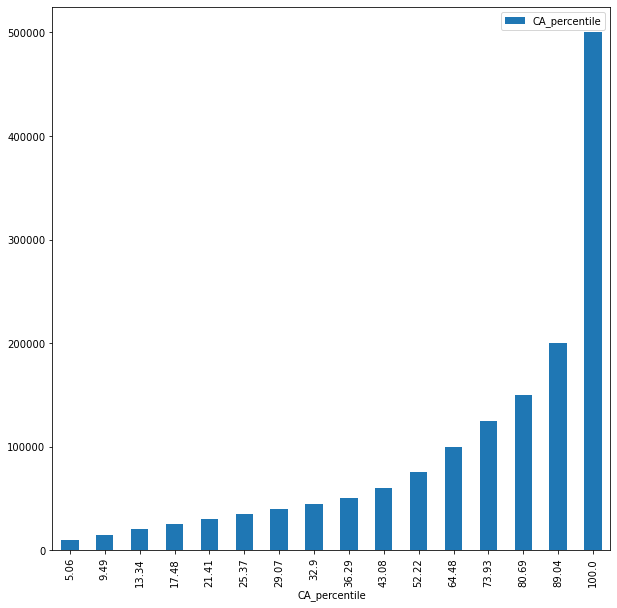

In [18]:
df = df.reset_index()
df['income_rate'] = df['index'].apply(lambda x: x.split('_')[2]).str.replace('or', '500000').astype(int)

# plotting percentile graphs
states = ['TX_percentile','FL_percentile','NY_percentile','CA_percentile', 'income_rate']
for x in states: 
    df[[x, 'income_rate']].plot.bar(x = x, y='income_rate', figsize=(10,10), label=x)